## Thickness Weighted Averaging (TWA)

An alternative to averaging at a constant depth is to average following isopycnals. The averaging that results is referred to as TWA, and here we will evaluate the tracer equations in this frame. 


In [1]:
import xarray as xr
from xmitgcm import open_mdsdataset
from matplotlib import pyplot as plt

import xgcm 
%matplotlib inline

In [9]:
import numpy as np

In [2]:
ds_dir = '/swot/SUM04/dbalwada/channel_model/05km_sponge/run_tracers_restored_3day_output/run_tracers_restored/'

In [3]:
ds = xr.open_zarr('/swot/SUM04/dbalwada/channel_model/05km_sponge/run_tracers_restored_3day_output/run_tracers_restored_zarr/')

In [79]:
# drop variables that have different axis, and not useful for TWA 
ds = ds.drop_vars(['Eta', 'PH', 'PHL','W'])

In [92]:
ds

<xarray.Dataset>
Dimensions:              (XC: 400, XG: 400, YC: 400, YG: 400, Z: 40, Zl: 40, Zp1: 41, Zu: 40, layer_1TH_bounds: 43, layer_1TH_center: 42, layer_1TH_interface: 41, time: 1980)
Coordinates:
    Depth                (YC, XC) float32 dask.array<chunksize=(400, 400), meta=np.ndarray>
    PHrefC               (Z) float32 dask.array<chunksize=(40,), meta=np.ndarray>
    PHrefF               (Zp1) float32 dask.array<chunksize=(41,), meta=np.ndarray>
  * XC                   (XC) float32 2500.0 7500.0 ... 1992500.0 1997500.0
  * XG                   (XG) float32 0.0 5000.0 10000.0 ... 1990000.0 1995000.0
  * YC                   (YC) float32 2500.0 7500.0 ... 1992500.0 1997500.0
  * YG                   (YG) float32 0.0 5000.0 10000.0 ... 1990000.0 1995000.0
  * Z                    (Z) float32 -5.0 -15.0 -25.0 ... -2830.5 -2933.5
  * Zl                   (Zl) float32 0.0 -10.0 -20.0 ... -2779.0 -2882.0
  * Zp1                  (Zp1) float32 0.0 -10.0 -20.0 ... -2882.0 -2985.0
  * Zu                   (Zu) float32 -10.0 -20.0 -30.0 ... -2882.0 -2985.0
    drC                  (Zp1) float32 dask.array<chunksize=(41,), meta=np.ndarray>
    drF                  (Z) float32 dask.array<chunksize=(40,), meta=np.ndarray>
    dxC                  (YC, XG) float32 dask.array<chunksize=(400, 400), meta=np.ndarray>
    dxG                  (YG, XC) float32 dask.array<chunksize=(400, 400), meta=np.ndarray>
    dyC                  (YG, XC) float32 dask.array<chunksize=(400, 400), meta=np.ndarray>
    dyG                  (YC, XG) float32 dask.array<chunksize=(400, 400), meta=np.ndarray>
    hFacC                (Z, YC, XC) float32 dask.array<chunksize=(40, 400, 400), meta=np.ndarray>
    hFacS                (Z, YG, XC) float32 dask.array<chunksize=(40, 400, 400), meta=np.ndarray>
    hFacW                (Z, YC, XG) float32 dask.array<chunksize=(40, 400, 400), meta=np.ndarray>
    iter                 (time) int64 dask.array<chunksize=(1,), meta=np.ndarray>
  * layer_1TH_bounds     (layer_1TH_bounds) float32 -0.2 0.0 0.2 ... 7.8 8.0 8.2
  * layer_1TH_center     (layer_1TH_center) float32 -0.1 0.1 0.3 ... 7.7 7.9 8.1
  * layer_1TH_interface  (layer_1TH_interface) float32 0.0 0.2 0.4 ... 7.8 8.0
    maskC                (Z, YC, XC) bool dask.array<chunksize=(40, 400, 400), meta=np.ndarray>
    maskS                (Z, YG, XC) bool dask.array<chunksize=(40, 400, 400), meta=np.ndarray>
    maskW                (Z, YC, XG) bool dask.array<chunksize=(40, 400, 400), meta=np.ndarray>
    rA                   (YC, XC) float32 dask.array<chunksize=(400, 400), meta=np.ndarray>
    rAs                  (YG, XC) float32 dask.array<chunksize=(400, 400), meta=np.ndarray>
    rAw                  (YC, XG) float32 dask.array<chunksize=(400, 400), meta=np.ndarray>
    rAz                  (YG, XG) float32 dask.array<chunksize=(400, 400), meta=np.ndarray>
  * time                 (time) timedelta64[ns] 61023 days ... 66960 days
Data variables:
    PTRACER01            (time, Z, YC, XC) float32 dask.array<chunksize=(1, 40, 400, 400), meta=np.ndarray>
    PTRACER02            (time, Z, YC, XC) float32 dask.array<chunksize=(1, 40, 400, 400), meta=np.ndarray>
    PTRACER03            (time, Z, YC, XC) float32 dask.array<chunksize=(1, 40, 400, 400), meta=np.ndarray>
    PTRACER04            (time, Z, YC, XC) float32 dask.array<chunksize=(1, 40, 400, 400), meta=np.ndarray>
    PTRACER05            (time, Z, YC, XC) float32 dask.array<chunksize=(1, 40, 400, 400), meta=np.ndarray>
    PTRACER06            (time, Z, YC, XC) float32 dask.array<chunksize=(1, 40, 400, 400), meta=np.ndarray>
    PTRACER07            (time, Z, YC, XC) float32 dask.array<chunksize=(1, 40, 400, 400), meta=np.ndarray>
    PTRACER08            (time, Z, YC, XC) float32 dask.array<chunksize=(1, 40, 400, 400), meta=np.ndarray>
    PTRACER09            (time, Z, YC, XC) float32 dask.array<chunksize=(1, 40, 400, 400), meta=np.ndarray>
    PTRACER10            (time, Z, YC, XC) float32 d

First we cast to buoyancy surface. This involves moving all the variables from x,y,z,t grid to
x,y,b,t grid. Essentially go from a regular z grid to a regular b grid. 

In [6]:
from xgcm import Grid

In [7]:
grid = Grid(ds, periodic='X')

In [93]:
ds['U'] = grid.interp(ds['U'], 'X')
ds['V'] = grid.interp(ds['V'], 'Y', boundary='extend')

In [30]:
Tcenter = np.linspace(0,8, 101)
dT = Tgrid[1] - Tgrid[0]
Touter = np.append(Tcenter - dT/2, Tcenter[-1] + dT/2)

In [80]:
ds = ds.chunk({'Z':-1, 'time':1, 'XC':400, 'YC':400,
                  'XC':400, 'YG':400, 'Zl':-1})

In [94]:
# cast available variables into isopycnal coordinates 
ds_iso = xr.Dataset()

for var_name in ds.keys():
    print(var_name)
    if var_name != 'T':
        ds_iso[var_name] = grid.transform(ds[var_name], 'Z', Tcenter,
                        target_data=ds['T'], method='linear')

PTRACER01
PTRACER02
PTRACER03
PTRACER04
PTRACER05
PTRACER06
PTRACER07
PTRACER08
PTRACER09
PTRACER10
PTRACER11
PTRACER12
PTRACER13
PTRACER14
PTRACER15
PTRACER16
PTRACER17
PTRACER18
PTRACER19
PTRACER20
T
U
V


In [98]:
# this is the variable \zeta 
Z_grid = ds.Z*ds['T']/ds['T'] # convert Z array to a 3D field
ds_iso['zeta'] = grid.transform(Z_grid, 'Z', Tcenter, 
                        target_data=ds['T'], method='linear')

In [99]:
ds_iso = ds_iso.assign_coords({'Tc':Touter})

In [101]:
grid_iso = Grid(ds_iso, coords={'T':{'center':'T', 'outer':'Tc'}},
                periodic='X')

In [102]:
grid_iso

<xgcm.Grid>
T Axis (not periodic, boundary=None):
  * center   T --> outer
  * outer    Tc --> center

In [106]:
# thickness
ds_iso['sigma'] = grid_iso.interp(grid_iso.diff(Ztilde, 'T', boundary='extend')/ dT, 
                             'T', boundary='extend')

In [107]:
ds_iso

<xarray.Dataset>
Dimensions:    (T: 101, Tc: 102, XC: 400, YC: 400, time: 1980)
Coordinates:
    Depth      (YC, XC) float32 dask.array<chunksize=(400, 400), meta=np.ndarray>
  * XC         (XC) float32 2500.0 7500.0 12500.0 ... 1992500.0 1997500.0
  * YC         (YC) float32 2500.0 7500.0 12500.0 ... 1992500.0 1997500.0
    iter       (time) int64 dask.array<chunksize=(1,), meta=np.ndarray>
    rA         (YC, XC) float32 dask.array<chunksize=(400, 400), meta=np.ndarray>
  * time       (time) timedelta64[ns] 61023 days 61026 days ... 66960 days
  * T          (T) float64 0.0 0.08 0.16 0.24 0.32 ... 7.68 7.76 7.84 7.92 8.0
  * Tc         (Tc) float64 -0.04 0.04 0.12 0.2 0.28 ... 7.72 7.8 7.88 7.96 8.04
Data variables:
    PTRACER01  (time, YC, XC, T) float64 dask.array<chunksize=(1, 400, 400, 101), meta=np.ndarray>
    PTRACER02  (time, YC, XC, T) float64 dask.array<chunksize=(1, 400, 400, 101), meta=np.ndarray>
    PTRACER03  (time, YC, XC, T) float64 dask.array<chunksize=(1, 400, 400, 101), meta=np.ndarray>
    PTRACER04  (time, YC, XC, T) float64 dask.array<chunksize=(1, 400, 400, 101), meta=np.ndarray>
    PTRACER05  (time, YC, XC, T) float64 dask.array<chunksize=(1, 400, 400, 101), meta=np.ndarray>
    PTRACER06  (time, YC, XC, T) float64 dask.array<chunksize=(1, 400, 400, 101), meta=np.ndarray>
    PTRACER07  (time, YC, XC, T) float64 dask.array<chunksize=(1, 400, 400, 101), meta=np.ndarray>
    PTRACER08  (time, YC, XC, T) float64 dask.array<chunksize=(1, 400, 400, 101), meta=np.ndarray>
    PTRACER09  (time, YC, XC, T) float64 dask.array<chunksize=(1, 400, 400, 101), meta=np.ndarray>
    PTRACER10  (time, YC, XC, T) float64 dask.array<chunksize=(1, 400, 400, 101), meta=np.ndarray>
    PTRACER11  (time, YC, XC, T) float64 dask.array<chunksize=(1, 400, 400, 101), meta=np.ndarray>
    PTRACER12  (time, YC, XC, T) float64 dask.array<chunksize=(1, 400, 400, 101), meta=np.ndarray>
    PTRACER13  (time, YC, XC, T) float64 dask.array<chunksize=(1, 400, 400, 101), meta=np.ndarray>
    PTRACER14  (time, YC, XC, T) float64 dask.array<chunksize=(1, 400, 400, 101), meta=np.ndarray>
    PTRACER15  (time, YC, XC, T) float64 dask.array<chunksize=(1, 400, 400, 101), meta=np.ndarray>
    PTRACER16  (time, YC, XC, T) float64 dask.array<chunksize=(1, 400, 400, 101), meta=np.ndarray>
    PTRACER17  (time, YC, XC, T) float64 dask.array<chunksize=(1, 400, 400, 101), meta=np.ndarray>
    PTRACER18  (time, YC, XC, T) float64 dask.array<chunksize=(1, 400, 400, 101), meta=np.ndarray>
    PTRACER19  (time, YC, XC, T) float64 dask.array<chunksize=(1, 400, 400, 101), meta=np.ndarray>
    PTRACER20  (time, YC, XC, T) float64 dask.array<chunksize=(1, 400, 400, 101), meta=np.ndarray>
    U          (time, YC, XC, T) float64 dask.array<chunksize=(1, 400, 399, 101), meta=np.ndarray>
    V          (time, YC, XC, T) float64 dask.array<chunksize=(1, 399, 400, 101), meta=np.ndarray>
    zeta       (time, YC, XC, T) float64 dask.array<chunksize=(1, 400, 400, 101), meta=np.ndarray>
    sigma      (time, YC, XC, T) float64 dask.array<chunksize=(1, 400, 400, 1), meta=np.ndarray>

In [115]:
# cast into averages  
ds_hat = xr.Dataset()

sigma_bar = ds_iso['sigma'].mean('time')

for var_name in ds_iso.keys():
    
    if (var_name != 'zeta' and var_name != 'sigma'):
        print(var_name)
        ds_hat[var_name] = (ds_iso[var_name]*ds_iso['sigma']).mean('time')/sigma_bar

PTRACER01
PTRACER02
PTRACER03
PTRACER04
PTRACER05
PTRACER06
PTRACER07
PTRACER08
PTRACER09
PTRACER10
PTRACER11
PTRACER12
PTRACER13
PTRACER14
PTRACER15
PTRACER16
PTRACER17
PTRACER18
PTRACER19
PTRACER20
U
V


In [117]:
%%time
sigma_bar.load()
ds_hat.load()

KeyboardInterrupt: 

In [118]:
# eddy corrs 

ds_twa_eddy = xr.Dataset()

for var_name in ds_hat.keys():
    if (var_name != 'U' and var_name != 'V'):
        print(var_name)
        
        ds_twa_eddy['U'+var_name] = 
        

SyntaxError: unexpected EOF while parsing (<ipython-input-118-a52e9f5271a4>, line 6)

/home/dbalwada/.conda/envs/pangeo/lib/python3.7/site-packages/dask/core.py:121: RuntimeWarning: invalid value encountered in true_divide
  return func(*(_execute_task(a, cache) for a in args))
/home/dbalwada/.conda/envs/pangeo/lib/python3.7/site-packages/xgcm/transform.py:60: RuntimeWarning: divide by zero encountered in _interp_1d_linear
  return _interp_1d_linear(phi, theta, target_theta_levels, mask_edges)


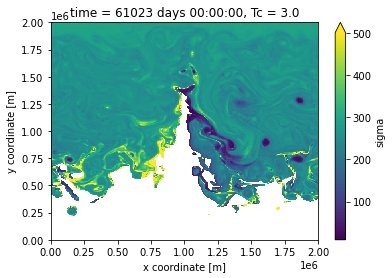

In [67]:
sigma.isel(time=0).sel(Tc=3, method='nearest').plot(vmax=500)

/home/dbalwada/.conda/envs/pangeo/lib/python3.7/site-packages/dask/core.py:121: RuntimeWarning: invalid value encountered in true_divide
  return func(*(_execute_task(a, cache) for a in args))
/home/dbalwada/.conda/envs/pangeo/lib/python3.7/site-packages/xgcm/transform.py:60: RuntimeWarning: divide by zero encountered in _interp_1d_linear
  return _interp_1d_linear(phi, theta, target_theta_levels, mask_edges)


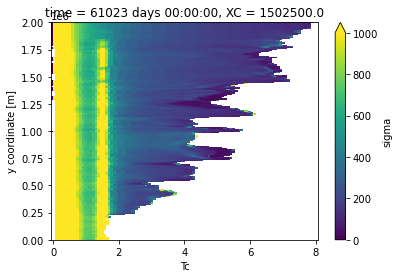

In [69]:
sigma.isel(time=0).sel(XC=1500e3, method='nearest').plot(vmax=1000)

In [73]:
C1hat = ((C1tilde * grid_iso.interp(sigma, 'T', boundary='extend')).mean('time')/
         grid_iso.interp(sigma, 'T', boundary='extend').mean('time'))

/home/dbalwada/.conda/envs/pangeo/lib/python3.7/site-packages/dask/core.py:121: RuntimeWarning: invalid value encountered in true_divide
  return func(*(_execute_task(a, cache) for a in args))
/home/dbalwada/.conda/envs/pangeo/lib/python3.7/site-packages/xgcm/transform.py:60: RuntimeWarning: divide by zero encountered in _interp_1d_linear
  return _interp_1d_linear(phi, theta, target_theta_levels, mask_edges)
/home/dbalwada/.conda/envs/pangeo/lib/python3.7/site-packages/xgcm/transform.py:60: RuntimeWarning: invalid value encountered in _interp_1d_linear
  return _interp_1d_linear(phi, theta, target_theta_levels, mask_edges)
/home/dbalwada/.conda/envs/pangeo/lib/python3.7/site-packages/dask/array/numpy_compat.py:41: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)


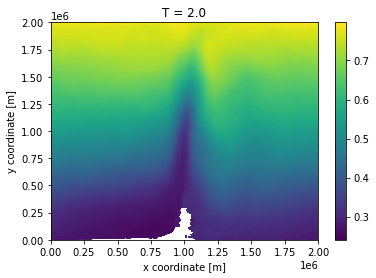

In [75]:
C1hat.sel(T=2).plot()